In [1]:
import pandas as pd
from prophet import Prophet


In [2]:
TRAIN_PATH = "data/train.csv"
TEST_PATH = "data/test.csv"
label = "Rank"

In [3]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
submission = pd.read_csv(TEST_PATH)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12750 entries, 0 to 12749
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              12750 non-null  int64  
 1   Game              12749 non-null  object 
 2   Month             12750 non-null  int64  
 3   Year              12750 non-null  int64  
 4   Hours_watched     12750 non-null  int64  
 5   Hours_Streamed    12750 non-null  int64  
 6   Peak_viewers      12750 non-null  int64  
 7   Peak_channels     12750 non-null  int64  
 8   Streamers         12750 non-null  int64  
 9   Avg_viewer_ratio  12750 non-null  float64
dtypes: float64(1), int64(8), object(1)
memory usage: 996.2+ KB


In [5]:
# Create a Date and Period COlumns

In [6]:
train['Day'] = 1
train['date'] = pd.to_datetime(train[['Year','Month','Day']])
train['date'] = train['date'].dt.to_period('M')

In [7]:
# Get unique Periods

In [8]:
periods = train['date'].nunique()

In [9]:
# Get games to predict
games = test['Game'].unique().tolist()

In [10]:
# Fill 

In [19]:
# Fill missing dates in time series
time_series = {}
idx = pd.period_range(min(train.date), max(train.date), freq='M')
for game in games:
    data = train[train['Game'] == game]
    data = data[['date','Rank','Hours_watched']]
    data = data.drop_duplicates('date')
    data = data.reset_index(drop=True)
    data = data.set_index(['date'])
    #data = data.reindex(idx, fill_value=0)
    data['ds'] = data.index
    data['ds'] = data['ds'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
    data['y'] = data['Hours_watched']
    time_series[game] = data
    #print(game)

In [20]:
time_series['Call of Duty: Warzone']

,Rank,Hours_watched,ds,y
date,,,,
2019-08,41,2834656,2019-08-01,2834656
2019-09,17,12193758,2019-09-01,12193758
2019-10,10,22685352,2019-10-01,22685352
2019-11,8,27132737,2019-11-01,27132737
2019-12,11,17686745,2019-12-01,17686745
2020-01,21,9027723,2020-01-01,9027723
2020-02,19,8989168,2020-02-01,8989168
2020-03,3,96459529,2020-03-01,96459529
2020-04,6,80164314,2020-04-01,80164314


In [21]:
time_series['Biomutant'].tail()

,Rank,Hours_watched,ds,y
date,,,,


In [22]:
# Create Forcase
forcasting = []
count = 0
for key,value in time_series.items():
    print(count)
    m = Prophet(seasonality_mode='multiplicative')
    m.fit(value[['ds','y']])
    future = m.make_future_dataframe(periods=1, freq = 'MS')
    forecast = m.predict(future)
    prediction = forecast['yhat'].tail(1).values[0]
    forcasting.append([key,prediction])
    count = count + 1

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.


0


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.


3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.


4


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.


5


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.


6


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.


8


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.


9


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.


11


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


12


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


13


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.


14
15


ValueError: Dataframe has less than 2 non-NaN rows.

In [32]:
#forcasting

In [23]:
sub = pd.DataFrame(forcasting)

In [24]:
sub[1] = sub[1].astype(int)

In [25]:
scoring = pd.read_csv('data/scoring.csv')
scoring = scoring[['Game','Rank','Hours_watched']]
test = test.merge(scoring, on='Game')

In [26]:
test

,Game,Month,Year,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio,Rank,Hours_watched
0,Life is Strange,5,2021,19085,119098,62,3240,71.19,128,1358711
1,Overwatch,5,2021,770340,111114,2056,77905,15.96,26,12292040
2,RuneScape,5,2021,48822,6467,122,3121,24.41,139,1191608
3,Conan Exiles,5,2021,61966,120347,405,4752,24.50,121,1518017
4,It Takes Two,5,2021,149157,39805,575,24734,19.58,81,2921152
...,...,...,...,...,...,...,...,...,...,...
195,Warframe,5,2021,140753,55140,362,11324,9.22,132,1297450
196,Science & Technology,5,2021,204954,29844,415,9530,15.34,71,3144131
197,Call of Duty: Mobile,5,2021,206379,13520,541,19575,6.55,130,1351713
198,"Pools, Hot Tubs, and Beaches",5,2021,44701,59425,268,8097,105.36,55,4709887


In [27]:
sub = sub.sort_values(by=1, ascending=False)
sub = sub.reset_index(drop=True)
sub = sub.reset_index(drop=False)

In [28]:
sub

,index,0,1
0,0,World of Warcraft,46527757
1,1,It Takes Two,20642193
2,2,Overwatch,19805269
3,3,Art,11112205
4,4,Black Desert Online,4274752
5,5,Mario Kart 8 Deluxe,2461151
6,6,Guild Wars 2,960478
7,7,Subnautica: Below Zero,637339
8,8,Tekken 7,480587
9,9,Life is Strange,308279


In [29]:
sub = sub.rename({'index':'Rank_prediction', 0:'Game',1:'Hours_Watched_Prediction'}, axis=1)

In [30]:
sub['Rank_prediction'] = sub['Rank_prediction'] + 1

In [31]:
test = test.merge(sub, on='Game')

In [32]:
test = test.sort_values(by='Rank', ascending=True)

In [33]:
test[['Game','Rank','Rank_prediction','Hours_Watched_Prediction']]

,Game,Rank,Rank_prediction,Hours_Watched_Prediction
13,World of Warcraft,14,1,46527757
1,Overwatch,26,3,19805269
11,Art,30,4,11112205
5,Subnautica: Below Zero,31,8,637339
10,Black Desert Online,59,5,4274752
8,Resident Evil 7 biohazard,67,12,-44641
14,Brawlhalla,80,11,14059
4,It Takes Two,81,2,20642193
9,Super Mario Party,106,15,-1108235
3,Conan Exiles,121,14,-641576


In [36]:
time_series['RuneScape']

,Rank,Hours_watched,ds,y
date,,,,
2016-01,17,4632857,2016-01-01,4632857
2016-02,16,4012630,2016-02-01,4012630
2016-03,13,5309272,2016-03-01,5309272
2016-04,13,5367602,2016-04-01,5367602
2016-05,10,5948742,2016-05-01,5948742
...,...,...,...,...
2020-12,169,748311,2020-12-01,748311
2021-01,161,792101,2021-01-01,792101
2021-02,123,1204025,2021-02-01,1204025


In [381]:
fig1 = m.plot(forecast)

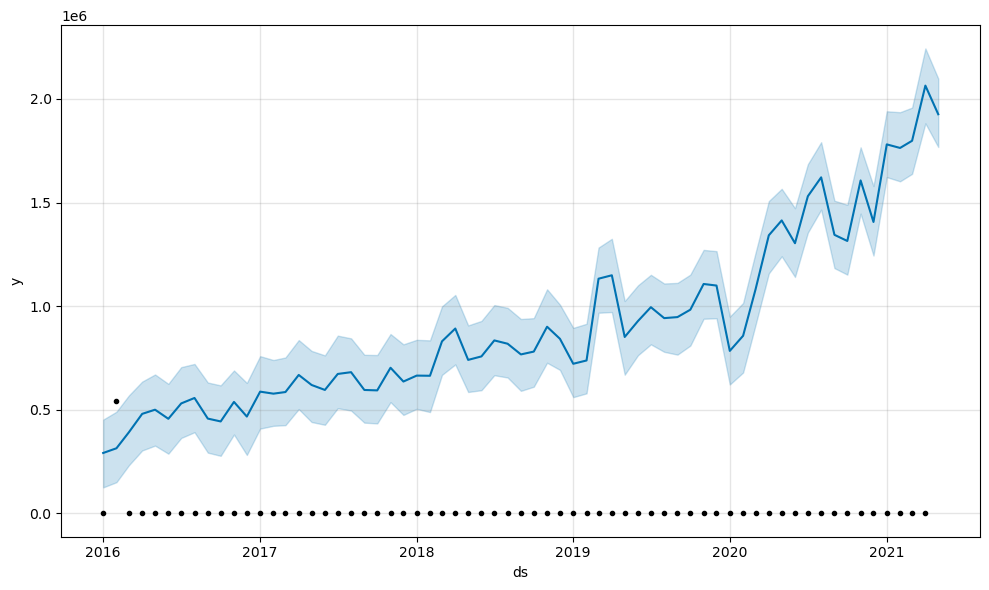

In [382]:
fig1

In [109]:
time_series["FIFA 16"]

,Rank,Hours_watched
2016-01,0,0
2016-02,0,0
2016-03,0,0
2016-04,0,0
2016-05,0,0
...,...,...
2020-12,0,0
2021-01,0,0
2021-02,0,0
2021-03,0,0


In [84]:
time_series[0]

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio,Day,date
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,69.29,1,2016-01-01
150,1,League of Legends,2,2016,93154772,1266715,475784,2712,117996,73.54,1,2016-02-01
350,1,League of Legends,3,2016,94514511,1264029,599114,2585,117734,74.77,1,2016-03-01
550,1,League of Legends,4,2016,88389049,1217250,553165,2945,113251,72.61,1,2016-04-01
750,1,League of Legends,5,2016,80679320,1196096,433005,2635,118593,67.45,1,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
11752,3,League of Legends,12,2020,96413165,3297197,318449,7979,247003,29.24,1,2020-12-01
11952,3,League of Legends,1,2021,170781975,4354400,689503,11606,294795,39.22,1,2021-01-01
12151,2,League of Legends,2,2021,150221076,3665750,703375,9687,268439,40.98,1,2021-02-01
12352,3,League of Legends,3,2021,149786518,3766997,853781,9222,268051,39.76,1,2021-03-01


In [33]:
for df in time_series:
    if df.shape[0] < 64:
        print(df.shape[0])

64
64
64
64
42
64
64
40
64
9
64
63
21
36
64
64
64
38
64
64
33
64
42
64
55
53
64
10
64
64
33
63
64
36
64
39
64
5
61
4
60
64
63
64
8
64
4
57
64
33
1
63
31
64
3
1
1
8
2
15
9
17
1
1
2
42
64
64
52
26
26
27
1
36
1
1
26
48
64
1
2
10
56
5
18
16
51
5
54
40
2
1
3
7
1
2
1
3
5
1
1
1
2
18
5
46
2
1
1
1
21
1
3
2
1
1
48
1
1
1
1
1
7
5
1
33
5
1
15
1
4
19
6
1
1
14
1
9
25
2
44
6
1
4
31
1
33
56
4
1
17
63
63
3
11
40
1
3
10
56
63
9
3
52
13
4
63
1
64
2
16
35
8
62
63
63
63
2
26
22
8
63
48
63
15
23
60
26
17
10
2
1
3
7
6
1
1
2
7
6
52
7
2
2
10
59
4
1
26
14
63
8
10
34
3
5
11
1
63
4
1
4
1
1
1
10
1
49
3
1
1
53
5
2
22
3
10
10
5
1
7
12
2
50
1
39
10
7
5
12
1
9
1
59
62
6
23
61
3
3
2
4
29
2
4
6
10
2
1
2
6
2
3
23
3
2
6
1
1
2
1
11
4
43
2
1
4
1
13
9
3
17
1
1
1
1
15
1
17
1
61
3
35
3
1
7
1
6
2
7
1
1
1
6
1
1
16
2
1
1
2
56
1
1
6
1
1
1
1
4
6
1
2
2
11
9
10
9
8
3
1
19
2
2
3
6
1
2
3
3
3
3
3
2
1
2
2
2
1
1
2
49
8
1
1
14
1
1
59
3
23
4
15
2
1
2
1
1
42
2
1
1
1
2
1
1
31
4
1
1
21
1
4
1
15
3
28
1
1
3
3
7
3
1
2
4
20
4
5
1
1
7
1
6
4
2
3
10
1

In [30]:
time_series[0]

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio,year-month
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,69.29,2016-1
150,1,League of Legends,2,2016,93154772,1266715,475784,2712,117996,73.54,2016-2
350,1,League of Legends,3,2016,94514511,1264029,599114,2585,117734,74.77,2016-3
550,1,League of Legends,4,2016,88389049,1217250,553165,2945,113251,72.61,2016-4
750,1,League of Legends,5,2016,80679320,1196096,433005,2635,118593,67.45,2016-5
...,...,...,...,...,...,...,...,...,...,...,...
11752,3,League of Legends,12,2020,96413165,3297197,318449,7979,247003,29.24,2020-12
11952,3,League of Legends,1,2021,170781975,4354400,689503,11606,294795,39.22,2021-1
12151,2,League of Legends,2,2021,150221076,3665750,703375,9687,268439,40.98,2021-2
12352,3,League of Legends,3,2021,149786518,3766997,853781,9222,268051,39.76,2021-3
